Importing libs and creating a dataset

In [1]:
import pandas as pd

### Создаем датасет

In [2]:
covid_df = pd.read_csv('data.csv')
covid_df.drop(['#', 'New Deaths', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Tests/1M pop'], axis=1, inplace=True)
covid_df = covid_df.replace(',', '', regex=True)
cols_to_convert = covid_df.columns.difference(['Country'])
covid_df[cols_to_convert] = covid_df[cols_to_convert].apply(pd.to_numeric, errors='coerce', downcast='integer')

print(covid_df.head())

   Country  Total Cases  Total Deaths  Total Recovered  Active Cases   
0      USA     98166904     1084282.0       94962112.0     2120510.0  \
1    India     44587307      528629.0       44019095.0       39583.0   
2   France     35342950      155078.0       34527115.0      660757.0   
3   Brazil     34706757      686027.0       33838636.0      182094.0   
4  Germany     33312373      149948.0       32315200.0      847225.0   

   Serious, Critical   Total Tests    Population  
0             2970.0  1.118159e+09  3.348053e+08  
1              698.0  8.944169e+08  1.406632e+09  
2              869.0  2.714902e+08  6.558452e+07  
3             8318.0  6.377617e+07  2.153536e+08  
4             1406.0  1.223324e+08  8.388360e+07  


### Получение основной информации о данных:

In [3]:
# Количество наблюдений и переменных
print("Количество наблюдений:", covid_df.shape[0])
print("Количество переменных:", covid_df.shape[1])
print("Типы данных:")
print(covid_df.dtypes)
print("Количество пропущенных значений:")
print(covid_df.isna().sum())

Количество наблюдений: 230
Количество переменных: 8
Типы данных:
Country               object
Total Cases            int32
Total Deaths         float64
Total Recovered      float64
Active Cases         float64
Serious, Critical    float64
Total Tests          float64
Population           float64
dtype: object
Количество пропущенных значений:
Country               0
Total Cases           0
Total Deaths          5
Total Recovered      16
Active Cases         15
Serious, Critical    83
Total Tests          16
Population            2
dtype: int64


### Вычисление основных статистических характеристик данных:

In [4]:
covid_df.describe()

,Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",Total Tests,Population
count,2.300000e+02,2.250000e+02,2.140000e+02,2.150000e+02,147.000000,2.140000e+02,2.280000e+02
mean,2.705969e+06,2.909820e+04,2.807255e+06,5.744895e+04,270.224490,3.137011e+07,3.484620e+07
std,8.779899e+06,1.022137e+05,8.815291e+06,2.073823e+05,922.698201,1.144561e+08,1.389233e+08
min,9.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000,5.117000e+03,7.990000e+02
25%,2.364900e+04,2.020000e+02,1.968325e+04,1.320000e+02,4.500000,3.462602e+05,5.170965e+05
50%,2.037110e+05,2.179000e+03,2.250110e+05,1.246000e+03,18.000000,2.172044e+06,5.816378e+06
75%,1.256286e+06,1.412200e+04,1.437441e+06,1.923950e+04,101.000000,1.267585e+07,2.254928e+07
max,9.816690e+07,1.084282e+06,9.496211e+07,2.120510e+06,8318.000000,1.118159e+09,1.448471e+09


In [5]:
covid_df[cols_to_convert].corr()

,Active Cases,Population,"Serious, Critical",Total Cases,Total Deaths,Total Recovered,Total Tests
Active Cases,1.000000,0.155051,0.409526,0.804822,0.655613,0.797077,0.583222
Population,0.155051,1.000000,0.202859,0.391914,0.418265,0.392310,0.542239
"Serious, Critical",0.409526,0.202859,1.000000,0.496345,0.706480,0.490444,0.271132
Total Cases,0.804822,0.391914,0.496345,1.000000,0.890765,0.999904,0.860259
Total Deaths,0.655613,0.418265,0.706480,0.890765,1.000000,0.889144,0.786278
Total Recovered,0.797077,0.392310,0.490444,0.999904,0.889144,1.000000,0.861810
Total Tests,0.583222,0.542239,0.271132,0.860259,0.786278,0.861810,1.000000


### Нарисовать гистограммы и боксплоты:

In [6]:
import matplotlib.pyplot as plt

#### Гистограммы


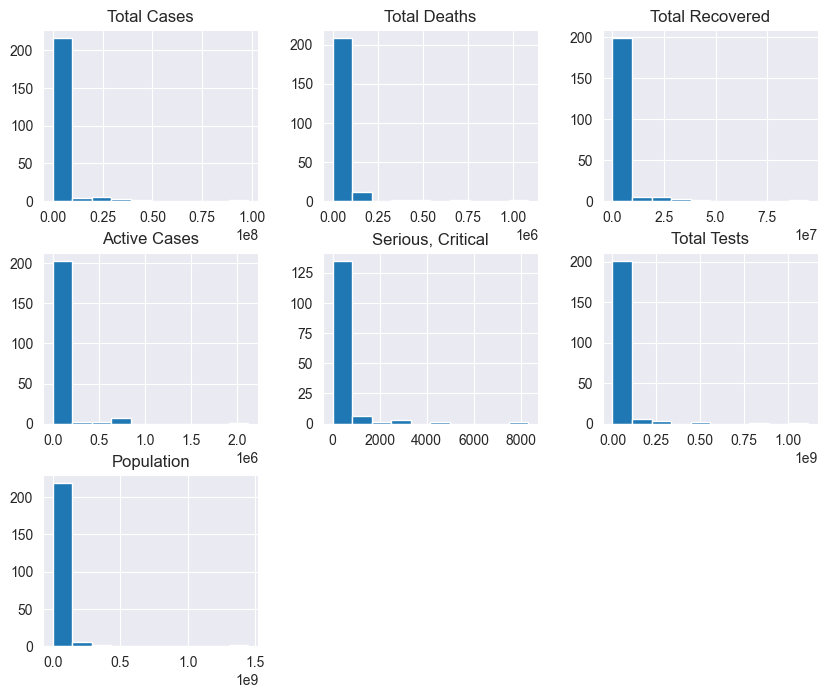

In [7]:
covid_df.hist(figsize=(10, 8))
plt.show()

#### Боксплоты

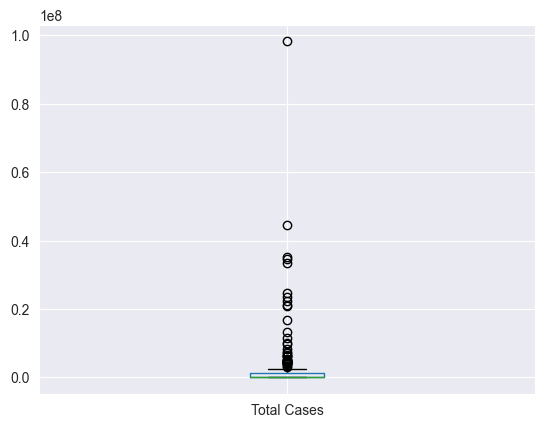

In [8]:
covid_df.boxplot(column=['Total Cases'])
plt.show()

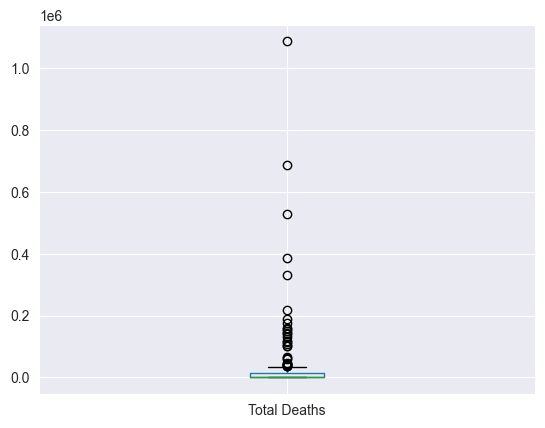

In [9]:
covid_df.boxplot(column=['Total Deaths'])
plt.show()

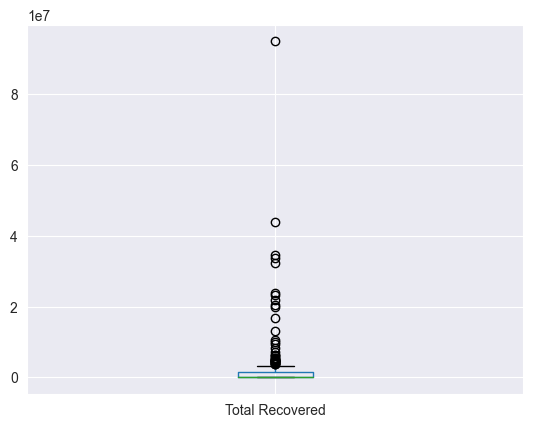

In [10]:
covid_df.boxplot(column=['Total Recovered'])
plt.show()

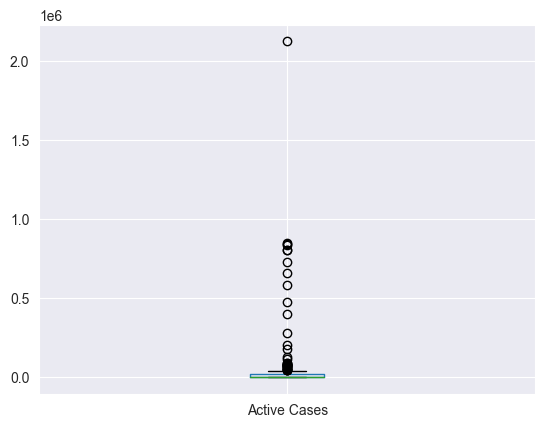

In [11]:
covid_df.boxplot(column=['Active Cases'])
plt.show()

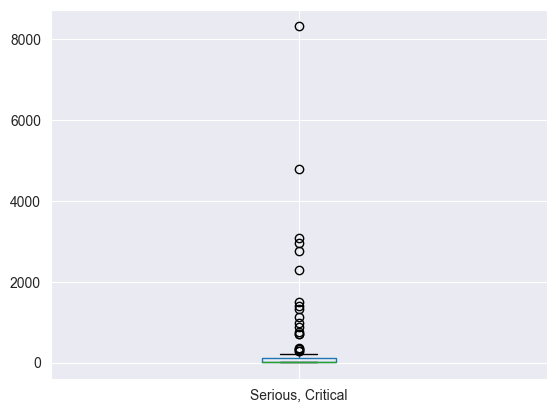

In [12]:
covid_df.boxplot(column=['Serious, Critical'])
plt.show()

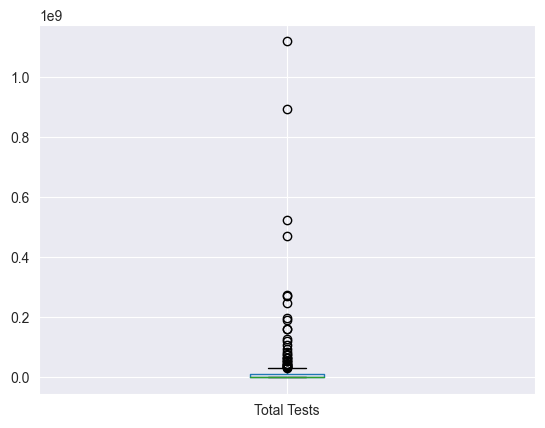

In [13]:
covid_df.boxplot(column=['Total Tests'])
plt.show()

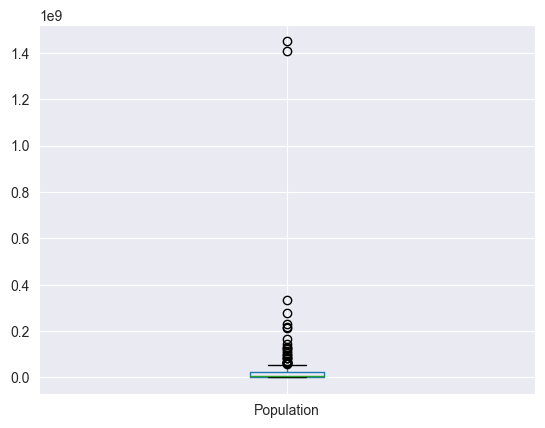

In [14]:
covid_df.boxplot(column=['Population'])
plt.show()

### Определение выбросов:

#### Выбросы по столбцу Total Cases

In [15]:
q1 = covid_df['Total Cases'].quantile(0.25)
q3 = covid_df['Total Cases'].quantile(0.75)
iqr = q3 - q1
outliers = ((covid_df['Total Cases'] < (q1 - 1.5 * iqr)) | (covid_df['Total Cases'] > (q3 + 1.5 * iqr)))
print("Выбросы:")
print(covid_df[outliers])
print("Количество выбросов:", covid_df[outliers].shape[0])

Выбросы:
         Country  Total Cases  Total Deaths  Total Recovered  Active Cases   
0            USA     98166904     1084282.0       94962112.0     2120510.0  \
1          India     44587307      528629.0       44019095.0       39583.0   
2         France     35342950      155078.0       34527115.0      660757.0   
3         Brazil     34706757      686027.0       33838636.0      182094.0   
4        Germany     33312373      149948.0       32315200.0      847225.0   
5       S. Korea     24769101       28406.0       24013461.0      727234.0   
6             UK     23621952      189919.0       23347871.0       84162.0   
7          Italy     22432803      177054.0       21779604.0      476145.0   
8          Japan     21229216       44678.0       20380089.0      804449.0   
9         Russia     20948470      387163.0       19979763.0      581544.0   
10        Turkey     16873793      101139.0       16754301.0       18353.0   
11         Spain     13412263      114084.0       13218

#### Выбросы по столбцу Total Deaths

In [16]:
q1 = covid_df['Total Deaths'].quantile(0.25)
q3 = covid_df['Total Deaths'].quantile(0.75)
iqr = q3 - q1
outliers = ((covid_df['Total Deaths'] < (q1 - 1.5 * iqr)) | (covid_df['Total Deaths'] > (q3 + 1.5 * iqr)))
print("Выбросы:")
print(covid_df[outliers])
print("Количество выбросов:", covid_df[outliers].shape[0])

Выбросы:
         Country  Total Cases  Total Deaths  Total Recovered  Active Cases   
0            USA     98166904     1084282.0       94962112.0     2120510.0  \
1          India     44587307      528629.0       44019095.0       39583.0   
2         France     35342950      155078.0       34527115.0      660757.0   
3         Brazil     34706757      686027.0       33838636.0      182094.0   
4        Germany     33312373      149948.0       32315200.0      847225.0   
6             UK     23621952      189919.0       23347871.0       84162.0   
7          Italy     22432803      177054.0       21779604.0      476145.0   
8          Japan     21229216       44678.0       20380089.0      804449.0   
9         Russia     20948470      387163.0       19979763.0      581544.0   
10        Turkey     16873793      101139.0       16754301.0       18353.0   
11         Spain     13412263      114084.0       13218892.0       79287.0   
12       Vietnam     11477886       43148.0       10590

#### Выбросы по столбцу Total Recovered

In [17]:
q1 = covid_df['Total Recovered'].quantile(0.25)
q3 = covid_df['Total Recovered'].quantile(0.75)
iqr = q3 - q1
outliers = ((covid_df['Total Recovered'] < (q1 - 1.5 * iqr)) | (covid_df['Total Recovered'] > (q3 + 1.5 * iqr)))
print("Выбросы:")
print(covid_df[outliers])
print("Количество выбросов:", covid_df[outliers].shape[0])

Выбросы:
         Country  Total Cases  Total Deaths  Total Recovered  Active Cases   
0            USA     98166904     1084282.0       94962112.0     2120510.0  \
1          India     44587307      528629.0       44019095.0       39583.0   
2         France     35342950      155078.0       34527115.0      660757.0   
3         Brazil     34706757      686027.0       33838636.0      182094.0   
4        Germany     33312373      149948.0       32315200.0      847225.0   
5       S. Korea     24769101       28406.0       24013461.0      727234.0   
6             UK     23621952      189919.0       23347871.0       84162.0   
7          Italy     22432803      177054.0       21779604.0      476145.0   
8          Japan     21229216       44678.0       20380089.0      804449.0   
9         Russia     20948470      387163.0       19979763.0      581544.0   
10        Turkey     16873793      101139.0       16754301.0       18353.0   
11         Spain     13412263      114084.0       13218

#### Выбросы по столбцу Active Cases

In [18]:
q1 = covid_df['Active Cases'].quantile(0.25)
q3 = covid_df['Active Cases'].quantile(0.75)
iqr = q3 - q1
outliers = ((covid_df['Active Cases'] < (q1 - 1.5 * iqr)) | (covid_df['Active Cases'] > (q3 + 1.5 * iqr)))
print("Выбросы:")
print(covid_df[outliers])
print("Количество выбросов:", covid_df[outliers].shape[0])

Выбросы:
           Country  Total Cases  Total Deaths  Total Recovered  Active Cases   
0              USA     98166904     1084282.0       94962112.0     2120510.0  \
2           France     35342950      155078.0       34527115.0      660757.0   
3           Brazil     34706757      686027.0       33838636.0      182094.0   
4          Germany     33312373      149948.0       32315200.0      847225.0   
5         S. Korea     24769101       28406.0       24013461.0      727234.0   
6               UK     23621952      189919.0       23347871.0       84162.0   
7            Italy     22432803      177054.0       21779604.0      476145.0   
8            Japan     21229216       44678.0       20380089.0      804449.0   
9           Russia     20948470      387163.0       19979763.0      581544.0   
11           Spain     13412263      114084.0       13218892.0       79287.0   
12         Vietnam     11477886       43148.0       10590917.0      843821.0   
13       Australia     10209239

#### Выбросы по столбцу Serious, Critical

In [19]:
q1 = covid_df['Serious, Critical'].quantile(0.25)
q3 = covid_df['Serious, Critical'].quantile(0.75)
iqr = q3 - q1
outliers = ((covid_df['Serious, Critical'] < (q1 - 1.5 * iqr)) | (covid_df['Serious, Critical'] > (q3 + 1.5 * iqr)))
print("Выбросы:")
print(covid_df[outliers])
print("Количество выбросов:", covid_df[outliers].shape[0])

Выбросы:
         Country  Total Cases  Total Deaths  Total Recovered  Active Cases   
0            USA     98166904     1084282.0       94962112.0     2120510.0  \
1          India     44587307      528629.0       44019095.0       39583.0   
2         France     35342950      155078.0       34527115.0      660757.0   
3         Brazil     34706757      686027.0       33838636.0      182094.0   
4        Germany     33312373      149948.0       32315200.0      847225.0   
5       S. Korea     24769101       28406.0       24013461.0      727234.0   
9         Russia     20948470      387163.0       19979763.0      581544.0   
10        Turkey     16873793      101139.0       16754301.0       18353.0   
11         Spain     13412263      114084.0       13218892.0       79287.0   
14     Argentina      9708420      129897.0        9563348.0       15175.0   
17        Mexico      7084488      330065.0        6353953.0      400470.0   
18     Indonesia      6429767      158093.0        6253

#### Выбросы по столбцу Total Tests

In [20]:
q1 = covid_df['Total Tests'].quantile(0.25)
q3 = covid_df['Total Tests'].quantile(0.75)
iqr = q3 - q1
outliers = ((covid_df['Total Tests'] < (q1 - 1.5 * iqr)) | (covid_df['Total Tests'] > (q3 + 1.5 * iqr)))
print("Выбросы:")
print(covid_df[outliers])
print("Количество выбросов:", covid_df[outliers].shape[0])

Выбросы:
          Country  Total Cases  Total Deaths  Total Recovered  Active Cases   
0             USA     98166904     1084282.0       94962112.0     2120510.0  \
1           India     44587307      528629.0       44019095.0       39583.0   
2          France     35342950      155078.0       34527115.0      660757.0   
3          Brazil     34706757      686027.0       33838636.0      182094.0   
4         Germany     33312373      149948.0       32315200.0      847225.0   
6              UK     23621952      189919.0       23347871.0       84162.0   
7           Italy     22432803      177054.0       21779604.0      476145.0   
8           Japan     21229216       44678.0       20380089.0      804449.0   
9          Russia     20948470      387163.0       19979763.0      581544.0   
10         Turkey     16873793      101139.0       16754301.0       18353.0   
11          Spain     13412263      114084.0       13218892.0       79287.0   
12        Vietnam     11477886       43148.

#### Выбросы по столбцу Population

In [21]:
q1 = covid_df['Population'].quantile(0.25)
q3 = covid_df['Population'].quantile(0.75)
iqr = q3 - q1
outliers = ((covid_df['Population'] < (q1 - 1.5 * iqr)) | (covid_df['Population'] > (q3 + 1.5 * iqr)))
print("Выбросы:")
print(covid_df[outliers])
print("Количество выбросов:", covid_df[outliers].shape[0])

Выбросы:
          Country  Total Cases  Total Deaths  Total Recovered  Active Cases   
0             USA     98166904     1084282.0       94962112.0     2120510.0  \
1           India     44587307      528629.0       44019095.0       39583.0   
2          France     35342950      155078.0       34527115.0      660757.0   
3          Brazil     34706757      686027.0       33838636.0      182094.0   
4         Germany     33312373      149948.0       32315200.0      847225.0   
6              UK     23621952      189919.0       23347871.0       84162.0   
7           Italy     22432803      177054.0       21779604.0      476145.0   
8           Japan     21229216       44678.0       20380089.0      804449.0   
9          Russia     20948470      387163.0       19979763.0      581544.0   
10         Turkey     16873793      101139.0       16754301.0       18353.0   
12        Vietnam     11477886       43148.0       10590917.0      843821.0   
16           Iran      7548320      144421.

### Проверка гипотезы:
Пример проверки гипотезы о равенстве средних значений двух выборок
H0: Total Cases = Total Recovered
H1: Total Cases > Total Recovered

In [22]:
import scipy.stats as stats

# Удаляем строки с пропущенными значениями в столбцах Total Cases и Total Recovered
covid_df_clean = covid_df.dropna(subset=['Total Cases', 'Total Recovered'])

# Проводим t-тест
t_statistic, p_value = stats.ttest_ind(covid_df_clean['Total Cases'], covid_df_clean['Total Recovered'],
                                       alternative='greater')
alpha = 0.05

print("p-значение:", p_value)
print('Принимаем нулевую гипотезу' if p_value > alpha else 'Отвергаем нулевую гипотезу')


p-значение: 0.4594578158332527
Принимаем нулевую гипотезу


### Построение линейной регрессии

<Axes: xlabel='Total Cases', ylabel='Total Tests'>

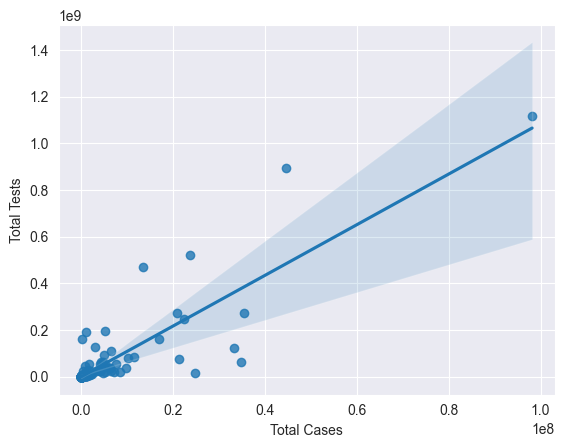

In [23]:
import seaborn as sns

sns.regplot(x='Total Cases', y='Total Tests', data=covid_df)


# Отчет

1. Работали с данными по COVID-19. Основная информация: Количество наблюдений - 230. Количество переменных - 8. Типы переменных - Country object, Total Cases int32, Total Deaths float64, Total Recovered float64, Active Cases float64, Serious, Critical float64, Total Tests float64, Population float64. Пропущенные значения - Country: 0, Total Cases: 0, Total Deaths: 5, Total Recovered: 16, Active Cases: 15, Serious, Critical: 83, Total Tests: 16, Population: 2
2. Средние, минимальные и максимальные значения по каждому столбцу:
    Total Cases: 2.705969e+06 9 9.816690e+07
    Total Deaths: 2.909820e+04 1 2.250000e+02
    Total Recovered: 2.807255e+06 2 9.496211e+07
    Active Cases: 2.807255e+06 0 2.120510e+06
    Serious, Critical: 270.224490 1 8318
    Total Tests: 3.137011e+07 5.117000e+03 1.118159e+09
    Population: 3.484620e+07 7.990000e+02 1.448471e+09
3. Корелляция показала, что наибольшая корреляция наблюдается между столбцами Total Cases и Total Recovered (0.99), а наименьшая - между столбцами Population и Active Cases (0.15). Также высокая корелляция наблюдается между столбцами Serious, Critical и Total Deaths (0.7), а также между столбцами Total Tests и Total Cases (0.86).
<!DOCTYPE html>
<html>
  <head>
    <title></title>
    <meta charset="UTF-8">
  </head>
<body>
<table border="1" style="border-collapse:collapse">
<tr>
  <th></th>
  <th>Active Cases</th>
  <th>Population</th>
  <th>Serious, Critical</th>
  <th>Total Cases</th>
  <th>Total Deaths</th>
  <th>Total Recovered</th>
  <th>Total Tests</th>
</tr>
<tr>
  <td>Active Cases</td>
  <td>1.000000</td>
  <td>0.155051</td>
  <td>0.409526</td>
  <td>0.804822</td>
  <td>0.655613</td>
  <td>0.797077</td>
  <td>0.583222</td>
</tr>
<tr>
  <td>Population</td>
  <td>0.155051</td>
  <td>1.000000</td>
  <td>0.202859</td>
  <td>0.391914</td>
  <td>0.418265</td>
  <td>0.392310</td>
  <td>0.542239</td>
</tr>
<tr>
  <td>Serious, Critical</td>
  <td>0.409526</td>
  <td>0.202859</td>
  <td>1.000000</td>
  <td>0.496345</td>
  <td>0.706480</td>
  <td>0.490444</td>
  <td>0.271132</td>
</tr>
<tr>
  <td>Total Cases</td>
  <td>0.804822</td>
  <td>0.391914</td>
  <td>0.496345</td>
  <td>1.000000</td>
  <td>0.890765</td>
  <td>0.999904</td>
  <td>0.860259</td>
</tr>
<tr>
  <td>Total Deaths</td>
  <td>0.655613</td>
  <td>0.418265</td>
  <td>0.706480</td>
  <td>0.890765</td>
  <td>1.000000</td>
  <td>0.889144</td>
  <td>0.786278</td>
</tr>
<tr>
  <td>Total Recovered</td>
  <td>0.797077</td>
  <td>0.392310</td>
  <td>0.490444</td>
  <td>0.999904</td>
  <td>0.889144</td>
  <td>1.000000</td>
  <td>0.861810</td>
</tr>
<tr>
  <td>Total Tests</td>
  <td>0.583222</td>
  <td>0.542239</td>
  <td>0.271132</td>
  <td>0.860259</td>
  <td>0.786278</td>
  <td>0.861810</td>
  <td>1.000000</td>
</tr>
</table>
</body>
</html>

4. Выбросы
    Total Cases: 40
    Total Deaths: 30
    Total Recovered: 38
    Active Cases: 36
    Serious, Critical: 20
    Total Tests: 34
    Population: 26

5. Гипотеза о том, что Total Cases и Total Recovered схожи, подтверждена
